# Initial EDA for UCLA EDA Final Project

### Importing Libraries and Data

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read in the data
housing = pd.read_csv('data/housing.csv')
schools = pd.read_csv('data/schools.csv')

### Data Joining

In [18]:
# Merge the data
# Use list to join each school type to the housing data
s_types = ["Elementary", "Middle", "High"]

# Create temporary dataframes for each school type and merge with housing dataframe
# Add size and rating columns to the housing dataframe for each school type
for s_type in s_types:

    size_col_name = (s_type + "_size").lower()
    rating_col_name = (s_type + "_rating").lower()

    tdf = schools[schools['school'].str.contains(s_type)]
    housing = housing.merge(tdf, left_on=s_type.lower(), right_on='school', how='left')

    housing = housing.rename(columns={'size': size_col_name, 'rating': rating_col_name})

# Remove the redundant school columns
housing.drop(columns=['school_x', 'school_y', 'school'], inplace=True)

In [21]:
cols = ['neighborhood', 'beds', 'baths', 'sqft', 'lotsize', 'year', 'type',
       'levels', 'cooling', 'heating', 'fireplace', 'soldprice', 'elementary',
       'elementary_size','elementary_rating', 'middle','middle_size','middle_rating',
       'high','high_size', 'high_rating']

housing = housing[cols]

In [24]:
housing.columns

Index(['neighborhood', 'beds', 'baths', 'sqft', 'lotsize', 'year', 'type',
       'levels', 'cooling', 'heating', 'fireplace', 'soldprice', 'elementary',
       'elementary_size', 'elementary_rating', 'middle', 'middle_size',
       'middle_rating', 'high', 'high_size', 'high_rating'],
      dtype='object')

### Data Cleaning

The goal of data cleaning is to handle missing values, remove outliers, and handle any other data issues that may arise. The data cleaning process is iterative, so it is important to keep track of the changes made to the data.

In [29]:
# Change some columns to categorical.
housing['cooling'] = pd.Categorical(housing['cooling'], categories=['Yes', 'No'], ordered=True)
housing['heating'] = pd.Categorical(housing['heating'], categories=['Yes', 'No'], ordered=True)
housing['fireplace'] = pd.Categorical(housing['fireplace'], categories=['Yes', 'No'], ordered=True)
housing['type'] = pd.Categorical(housing['type'], ordered=True)

In [48]:
nbhs = housing.groupby('neighborhood')['soldprice'].mean().sort_values(ascending=False).index.to_list()

housing['neighborhood'] = pd.Categorical(housing['neighborhood'], categories=nbhs, ordered=True)

#### Missing Values

For the first iteration of analysis, we will drop all rows with missing values in any column.

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 682
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   neighborhood       645 non-null    category
 1   beds               645 non-null    int64   
 2   baths              645 non-null    float64 
 3   sqft               645 non-null    float64 
 4   lotsize            645 non-null    float64 
 5   year               645 non-null    int64   
 6   type               645 non-null    category
 7   levels             645 non-null    object  
 8   cooling            645 non-null    category
 9   heating            645 non-null    category
 10  fireplace          645 non-null    category
 11  soldprice          645 non-null    int64   
 12  elementary         645 non-null    object  
 13  elementary_size    645 non-null    int64   
 14  elementary_rating  645 non-null    int64   
 15  middle             645 non-null    object  
 16  middle_s

In [38]:
housing.dropna(inplace=True)

In [25]:
housing.describe()

,beds,baths,sqft,lotsize,year,soldprice,elementary_size,elementary_rating,middle_size,middle_rating,high_size,high_rating
count,683.000000,683.000000,681.000000,663.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.937042,2.001464,2127.562408,0.288869,1977.461201,1.244857e+06,742.825769,5.746706,693.265007,6.178624,967.423133,5.926794
std,38.121012,1.392269,1069.311206,0.184496,30.280016,3.761917e+05,102.282215,2.404535,120.233272,1.948083,153.084918,2.920837
min,1.000000,1.000000,536.000000,0.070000,1495.000000,6.640000e+02,600.000000,1.000000,500.000000,2.000000,750.000000,1.000000
25%,3.000000,1.000000,1349.000000,0.160000,1961.000000,9.745000e+05,700.000000,4.000000,600.000000,5.000000,850.000000,4.000000
50%,4.000000,1.500000,1955.000000,0.240000,1978.000000,1.267000e+06,750.000000,6.000000,700.000000,7.000000,1000.000000,6.000000
75%,4.000000,2.500000,2676.000000,0.360000,1997.000000,1.548000e+06,800.000000,8.000000,800.000000,8.000000,1100.000000,8.000000
max,999.000000,25.000000,5265.000000,1.300000,2111.000000,2.393000e+06,900.000000,10.000000,900.000000,9.000000,1250.000000,10.000000


In [54]:
housing = housing[housing['soldprice'] != housing['soldprice'].min()].reset_index(drop=True)

### Data Exploration

In [56]:
housing.corr(numeric_only=True).style.background_gradient(cmap='RdBu_r', axis=None)

,beds,baths,sqft,lotsize,year,soldprice,elementary_size,elementary_rating,middle_size,middle_rating,high_size,high_rating
beds,1.000000,0.634544,0.928214,0.615052,0.035121,0.330954,-0.084143,0.006385,-0.006750,0.022058,0.016722,0.016885
baths,0.634544,1.000000,0.640476,0.429442,0.040204,0.243434,-0.026398,0.044443,-0.015407,0.012101,0.039508,-0.013984
sqft,0.928214,0.640476,1.000000,0.661275,0.022612,0.308124,-0.073216,0.005875,-0.016443,0.011941,0.008430,0.006325
lotsize,0.615052,0.429442,0.661275,1.000000,0.015009,0.208228,-0.041366,0.009587,-0.001125,-0.007643,-0.035760,-0.024812
year,0.035121,0.040204,0.022612,0.015009,1.000000,0.326286,0.022826,0.276743,-0.060058,0.341867,-0.019431,0.253036
soldprice,0.330954,0.243434,0.308124,0.208228,0.326286,1.000000,-0.066141,0.337689,-0.192902,0.447371,0.012485,0.528478
elementary_size,-0.084143,-0.026398,-0.073216,-0.041366,0.022826,-0.066141,1.000000,0.189972,-0.130956,0.016272,-0.260366,-0.066650
elementary_rating,0.006385,0.044443,0.005875,0.009587,0.276743,0.337689,0.189972,1.000000,-0.320696,0.593606,0.012082,0.537354
middle_size,-0.006750,-0.015407,-0.016443,-0.001125,-0.060058,-0.192902,-0.130956,-0.320696,1.000000,-0.437774,0.013938,-0.255494
middle_rating,0.022058,0.012101,0.011941,-0.007643,0.341867,0.447371,0.016272,0.593606,-0.437774,1.000000,-0.022327,0.627422


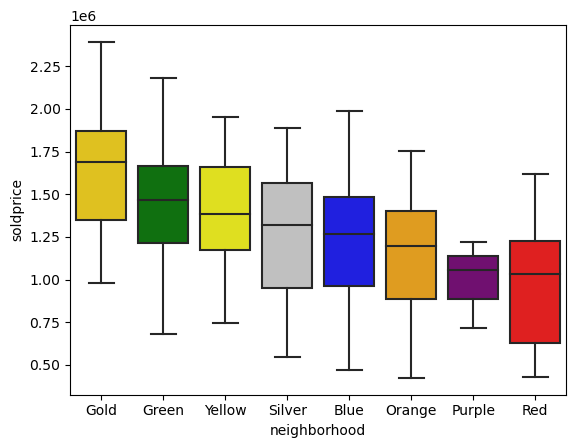

In [74]:
sns.boxplot(x='neighborhood', y='soldprice', data=housing, palette=nbhs)
plt.show()

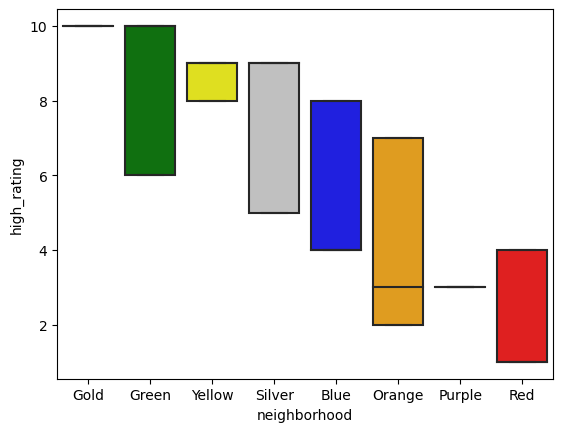

In [80]:
sns.boxplot(x='neighborhood', y='high_rating', data=housing, palette=nbhs)
plt.show()

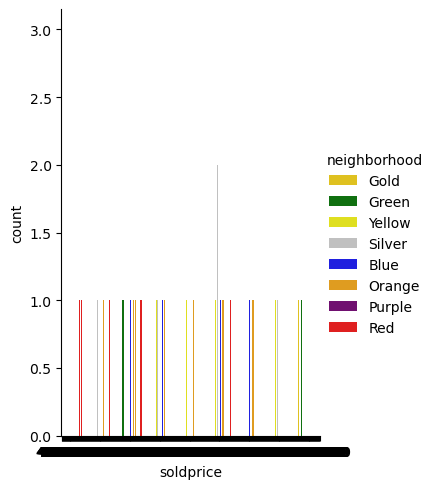

In [107]:
sns.catplot(data=housing, kind='count', x='soldprice', hue='neighborhood', palette=nbhs, height=5, aspect=.7)
plt.show()

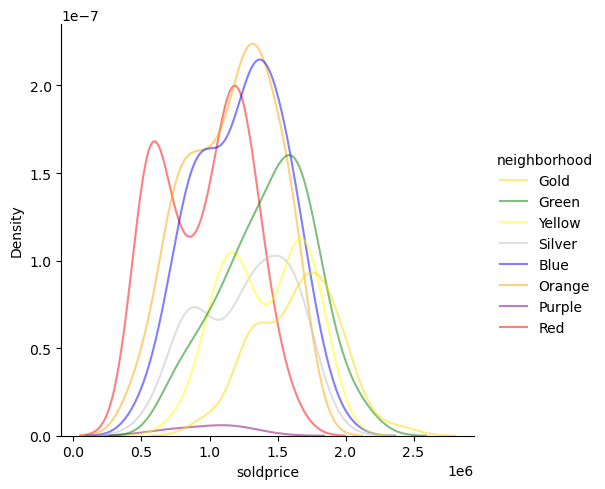

In [76]:
sns.displot(kind='kde',data=housing, x='soldprice', hue='neighborhood', palette=nbhs, alpha=0.5)
plt.show()

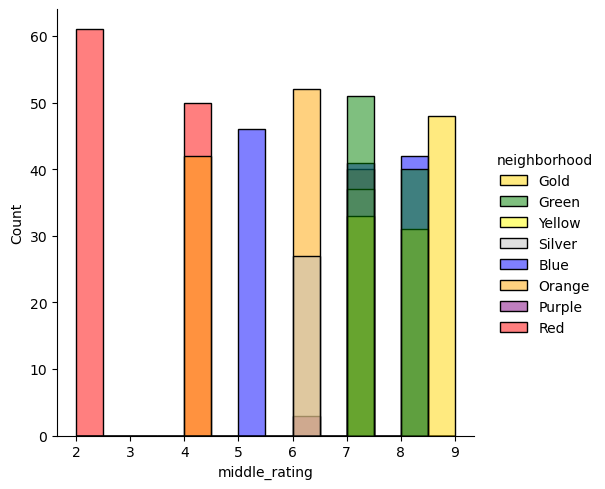

In [79]:
sns.displot(data=housing, x='middle_rating', hue='neighborhood', palette=nbhs, alpha=0.5)
plt.show()

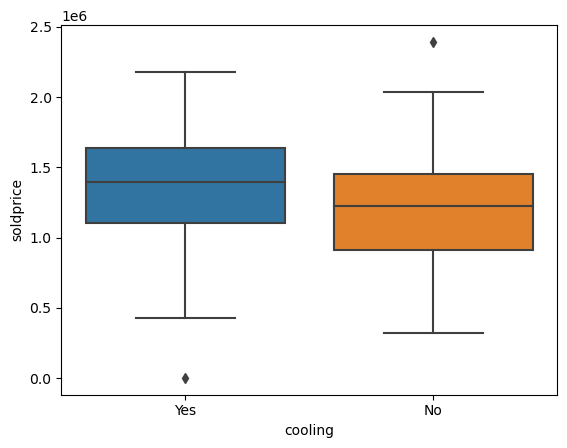

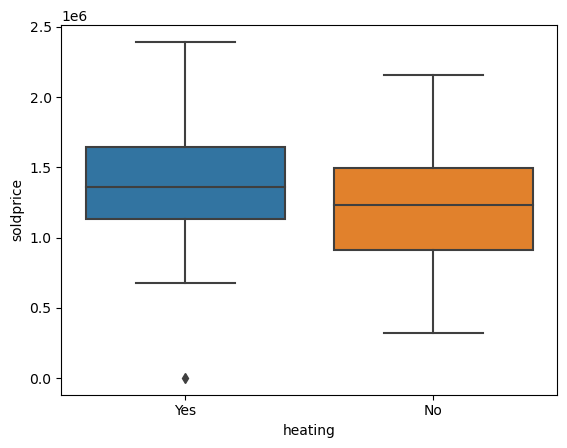

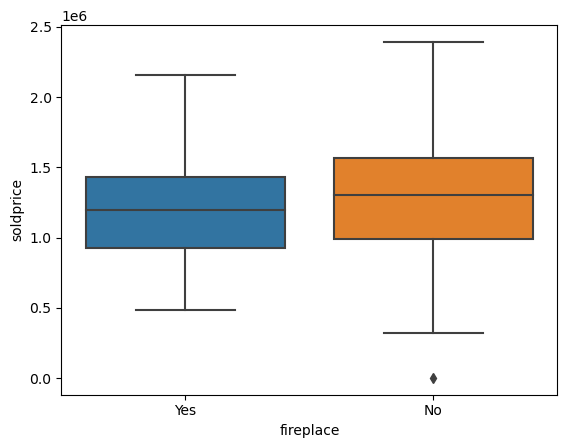

In [13]:
sns.boxplot(x='cooling', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='heating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='fireplace', y='soldprice', data=housing)
plt.show()

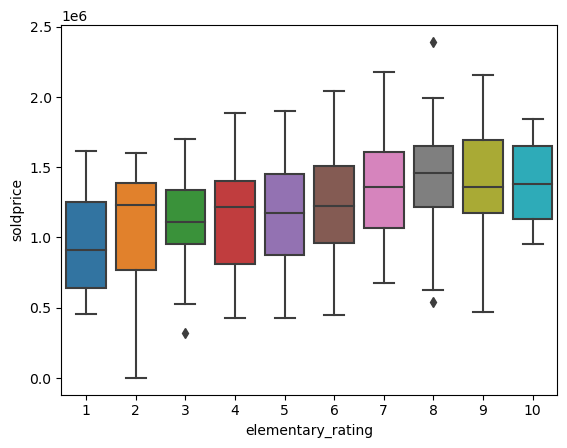

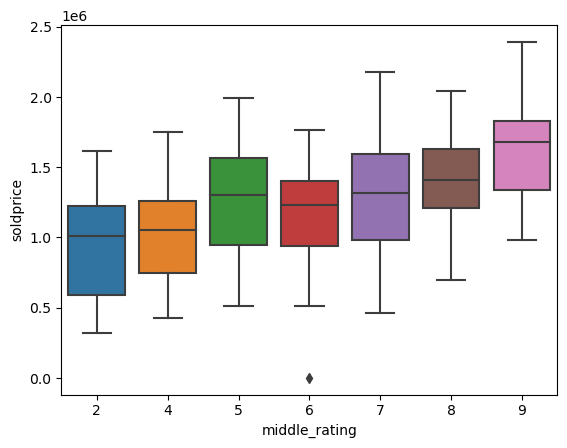

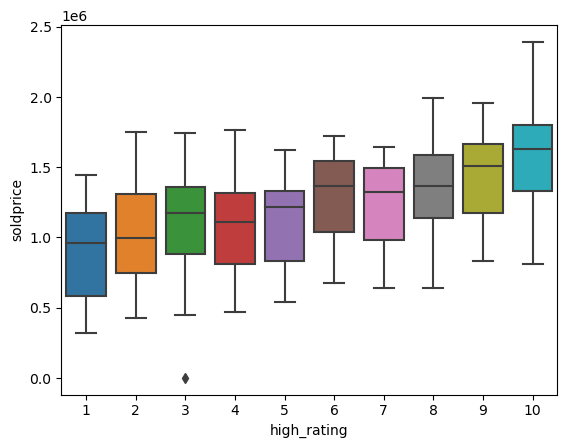

In [12]:
sns.boxplot(x='elementary_rating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='middle_rating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='high_rating', y='soldprice', data=housing)
plt.show()

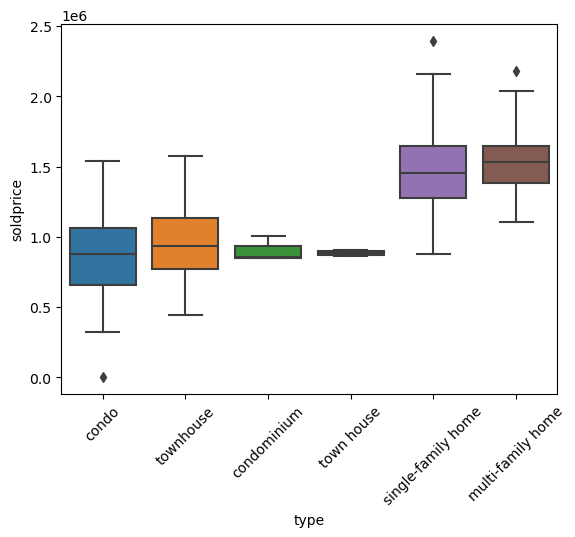

In [30]:
sns.boxplot(x='type', y='soldprice', data=housing.sort_values('soldprice'))
plt.xticks(rotation=45)
plt.show()

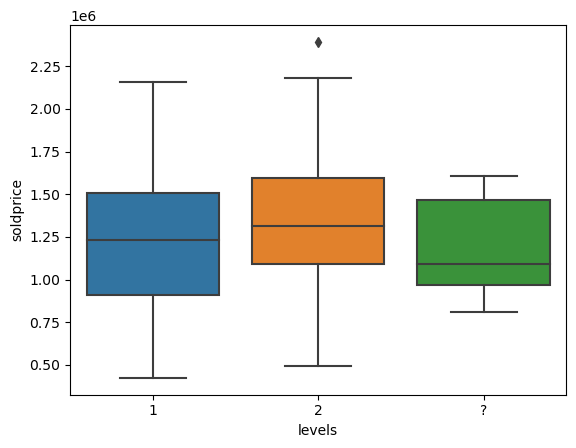

In [108]:
sns.boxplot(x='levels', y='soldprice', data=housing)
plt.show()

<AxesSubplot: xlabel='beds', ylabel='soldprice'>

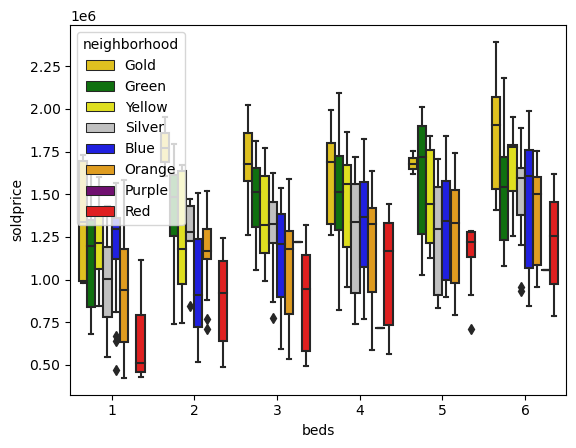

In [112]:
sns.boxplot(x='beds', y='soldprice', hue='neighborhood', data=housing, palette=nbhs)

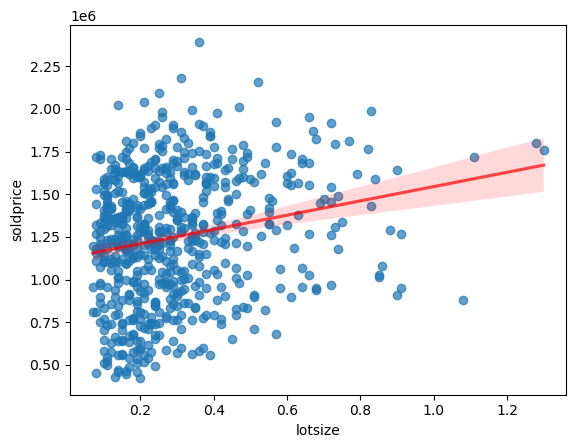

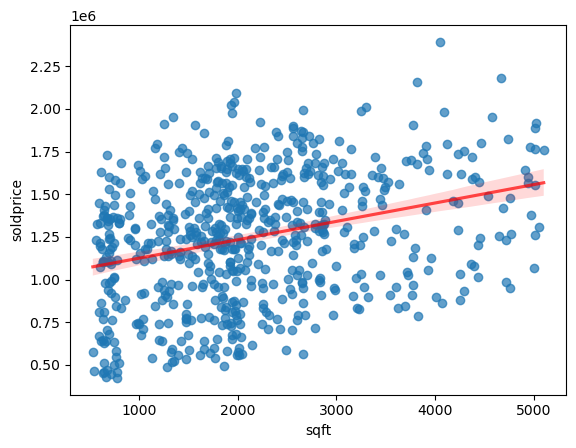

In [113]:
sns.regplot(x='lotsize', y='soldprice', data=housing, scatter_kws={'alpha':0.7},line_kws={'color': 'red', 'alpha': 0.7})
plt.show()

sns.regplot(x='sqft', y='soldprice', data=housing, scatter_kws={'alpha':0.7}, line_kws={'color': 'red', 'alpha': 0.7})
plt.show()

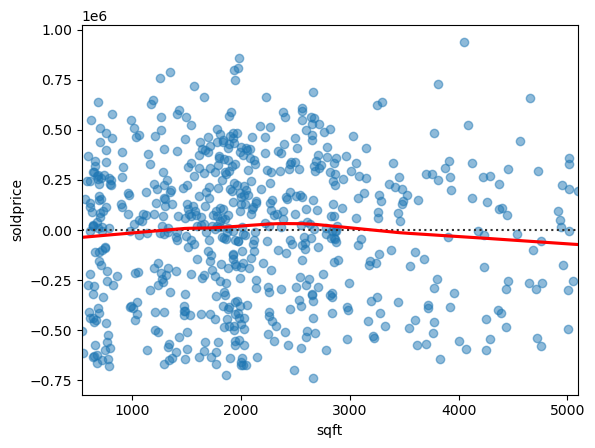

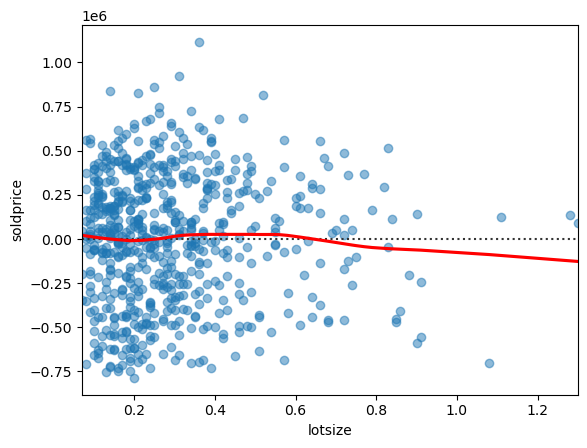

In [114]:
sns.residplot(x='sqft', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

sns.residplot(x='lotsize', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

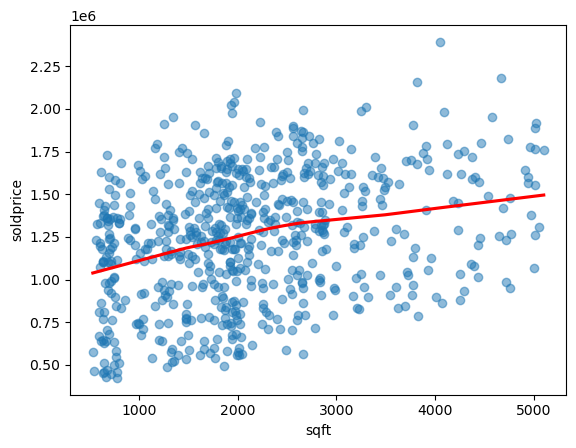

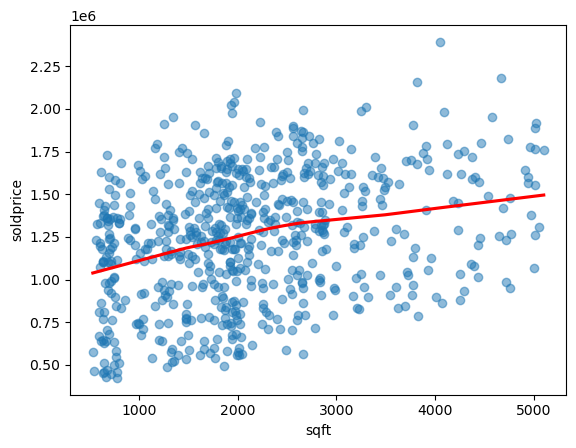

In [115]:
sns.regplot(x='sqft', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

sns.regplot(x='sqft', y='soldprice', data=housing, lowess=True, n_boot=10000,scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()
